In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the training and testing datasets
train_data_path = '../data/train_data.csv'
test_data_path = '../data/test_data.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [3]:
# Define the features and target variable
feature_input_select = ['sqft_log','beds_std','full_baths_std','total_rooms_std', 'zip_code']
target_variable = 'sold_price_log'

X_train = train_data[feature_input_select]
y_train = train_data[target_variable]

X_test = test_data[feature_input_select]
y_test = test_data[target_variable]

In [4]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [5]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [6]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
# print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Root Mean Squared Error (RMSE): 0.30637023264222013
Mean Absolute Error (MAE): 0.22009046756824888
R-squared (R²): 0.6818871984701236


In [7]:
# Save the model
model_file_path = '../models/random_forest_model.pkl'
joblib.dump(rf_model, model_file_path)
print(f"Random Forest model saved to {model_file_path}")

Random Forest model saved to ../models/random_forest_model.pkl


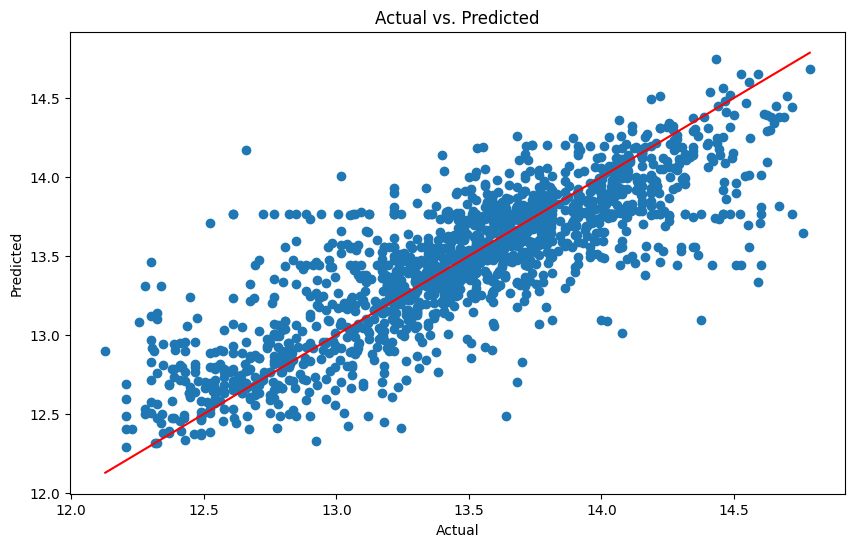

In [9]:
# see the predicted results of the model, using plot:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()